### Tree A or Tree 2 (In Thesis) Analysis.

imports the relevant functions used in processing and making the plots

In [1]:
from functions import *  # imports all the functions from module function.py

##### #1: Read the Particular Tree Directory and create relevant arrays

In [2]:
coord_array, amp_array, depth_z = create_cartes_init(tree_folder = 'data/Tree2_11x6_migrated',
                                                     stored_rad='05512', start_radius = 55.12)

In [3]:
coord_array.shape, amp_array.shape, depth_z.shape 

((174, 4), (422, 174), (422,))

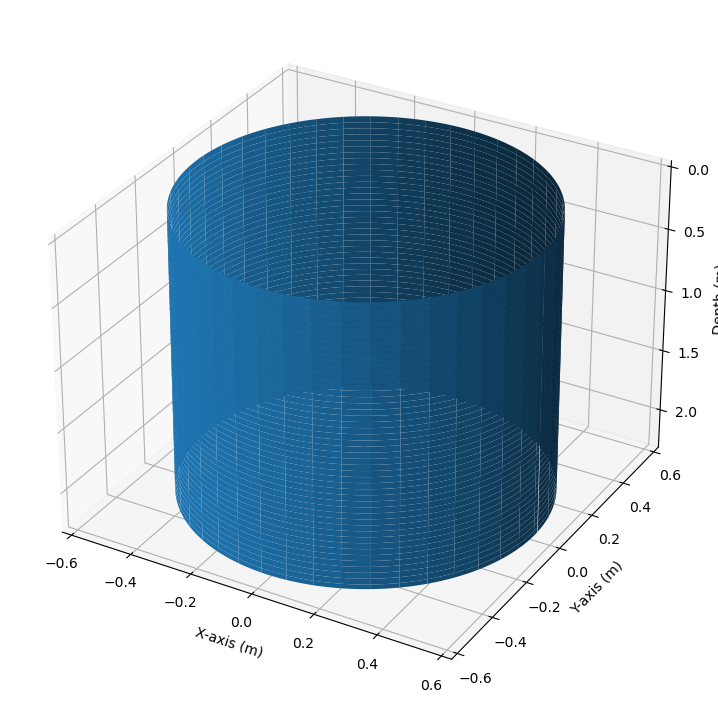

In [4]:
plot_init_transect(coord_array, depth=depth_z)

##### #2: Update the coord_array and amp_array with the remaining transects

In [5]:
coord_array, amp_array = create_cartes_arr(coord_array, amp_array, 
                                           tree_folder = 'data/Tree2_11x6_migrated', start_radius = 65.12)

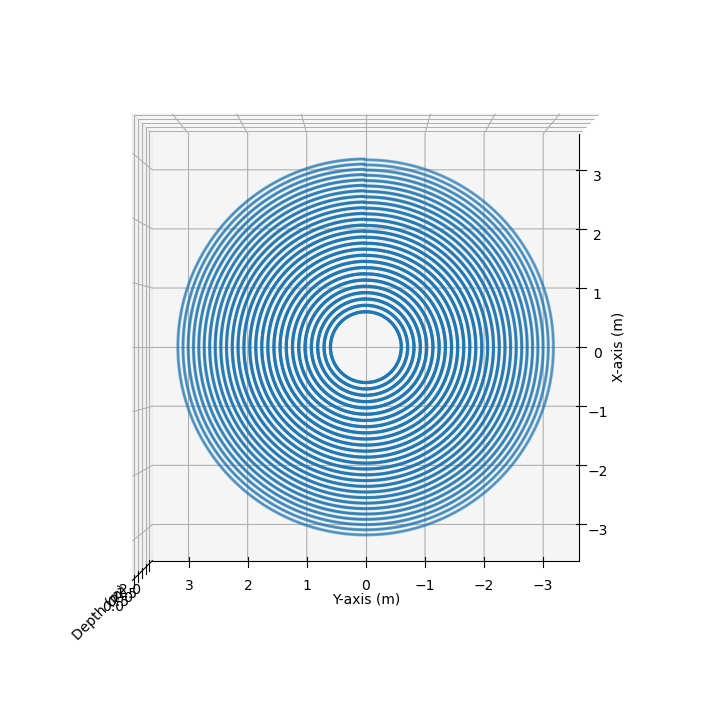

In [6]:
plot_cartes_coord(coord_array, depth=depth_z, top_view=True)

In [7]:
list_dir = os.listdir('data/Tree2_11x6_migrated')  # a list of the tree's transects
list_dir = sorted(list_dir)  # Added sorted to the list
list_dir

['Migrated_05512.ASC',
 'Migrated_06512.ASC',
 'Migrated_07512.ASC',
 'Migrated_08512.ASC',
 'Migrated_09512.ASC',
 'Migrated_10512.ASC',
 'Migrated_11512.ASC',
 'Migrated_12512.ASC',
 'Migrated_13512.ASC',
 'Migrated_14512.ASC',
 'Migrated_15512.ASC',
 'Migrated_16512.ASC',
 'Migrated_17512.ASC',
 'Migrated_18512.ASC',
 'Migrated_19512.ASC',
 'Migrated_20512.ASC',
 'Migrated_21512.ASC',
 'Migrated_22512.ASC',
 'Migrated_23512.ASC',
 'Migrated_24512.ASC',
 'Migrated_25512.ASC',
 'Migrated_26512.ASC',
 'Migrated_27512.ASC',
 'Migrated_28512.ASC',
 'Migrated_29512.ASC',
 'Migrated_30512.ASC',
 'Migrated_31512.ASC']

##### #3: Create Mesh For the Amplitude

In [8]:
x_arrT2, y_arrT2, z_arrT2, c_arrT2 = create_mesh(coord_array, amp_array, depth_z)

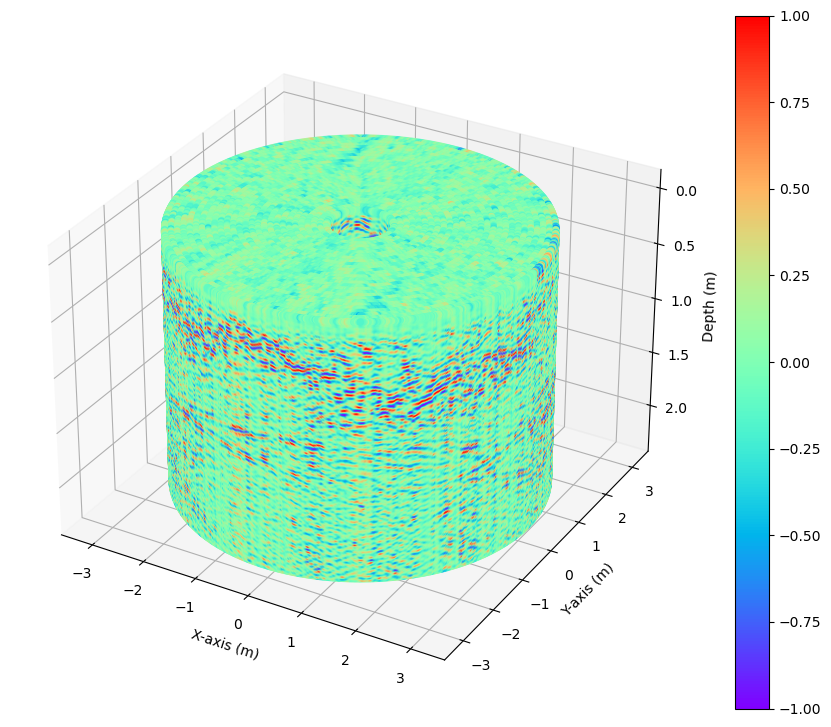

In [9]:
matplot_amplitude(x_arrT2, y_arrT2, z_arrT2, c_arrT2, top_view=False)

##### #4: Plotting Depth Slices

#### The `depth_slice` function makest the plot for any depth entered in meters using plotly interactive plots and output the values plotted which is then used for the interpolation of the points.

Interactive plot using Plotly

In [10]:
DS_10cm = depth_slice(x_arrT2, y_arrT2, z_arrT2, c_arrT2, depth=0.1)

Static Plot using Matplotlib

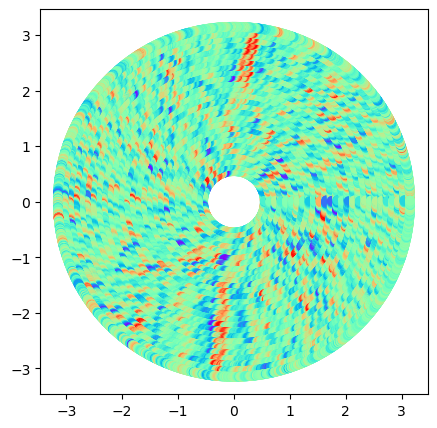

In [11]:
# Plotting depth 15 cm
cmap = plt.cm.rainbow
plt.figure(figsize=(5, 5))
plt.scatter(DS_10cm[0], DS_10cm[1], c=DS_10cm[3], cmap=cmap)

During the interpolation of some of the depth slices, the RBF returned a `stationary` matrix error, which is usually a result when one of the pivot of the matrix is zero, which result in `matrix determinant = 0`.

To correct for this, the arrays were downsampled to give the matrix some uniqueness and also not affecting the resolution of the amplitudes.

In [12]:
# put the array in a list
arr = [x_arrT2, y_arrT2, z_arrT2, c_arrT2]
x_arr, y_arr, z_arr, c_arr = downsample_array(x_arrT2, y_arrT2, \
                                              z_arrT2, c_arrT2, downsamp_step=2)

The downsampled arrays was splitted into different depth slices using the `return_arr_depth_5_45cm` function as written below.

In [13]:
_5cm ,_10cm, _15cm, _20cm, _25cm, _30cm, _35cm, _40cm, _45cm =return_arr_depth_5_45cm(
    x_arr, y_arr, z_arr, c_arr)

The depth of 40 cm had an error during interpolation and `39.99 cm` was selected which is approximately `40 cm` as seen in the third array representing the depth.

In [15]:
_40cm = return_arr(x_arr, y_arr, z_arr, c_arr, depth=.39)
_40cm

[array([0.5508372 , 0.54974926, 0.54793762, ..., 3.15113921, 3.15119997,
        3.1511338 ]),
 array([ 0.01999561,  0.0399649 ,  0.05988158, ..., -0.01957341,
         0.00042646,  0.02042632]),
 array([0.39944181, 0.39944181, 0.39944181, ..., 0.39944181, 0.39944181,
        0.39944181]),
 array([-0.63650455, -0.83962785, -0.85176794, ..., -0.44856207,
        -0.24142919, -0.1373854 ])]

##### #5: Interpolating the amplitude for better visualization of the roots.

A High computing clusters were used to compute the following as a result of the interpolation of millions of points that were interpolated.

It took five minutes to run on an `HPCC of 10 Cores and 500 GB memory`

In [16]:
num_grid_value = 200
grid_ext_val = 3.6
int_mesh_5cm, ampl_5cm = interpolator(_5cm, num_grid= num_grid_value, grid_ext= grid_ext_val)
int_mesh_10cm, ampl_10cm = interpolator(_10cm, num_grid= num_grid_value, grid_ext= grid_ext_val)
int_mesh_15cm, ampl_15cm = interpolator(_15cm, num_grid= num_grid_value, grid_ext= grid_ext_val)
int_mesh_20cm, ampl_20cm = interpolator(_20cm, num_grid= num_grid_value, grid_ext= grid_ext_val)
int_mesh_25cm, ampl_25cm = interpolator(_25cm, num_grid= num_grid_value, grid_ext= grid_ext_val)
int_mesh_30cm, ampl_30cm= interpolator(_30cm, num_grid= num_grid_value, grid_ext= grid_ext_val)
int_mesh_35cm, ampl_35cm = interpolator(_35cm, num_grid= num_grid_value, grid_ext= grid_ext_val)
int_mesh_40cm, ampl_40cm = interpolator(_40cm, num_grid= num_grid_value, grid_ext= grid_ext_val)
int_mesh_45cm, ampl_45cm = interpolator(_45cm, num_grid= num_grid_value, grid_ext= grid_ext_val)

##### #6: Plotting the depth slices for the interpolated Amplitude using the `RBF Interpolation` library

In [17]:
# A list that adds include all the amplitude
amplitude_list = [ampl_5cm, ampl_10cm, ampl_15cm, ampl_20cm, ampl_25cm,  
                  ampl_30cm, ampl_35cm, ampl_40cm, ampl_45cm]

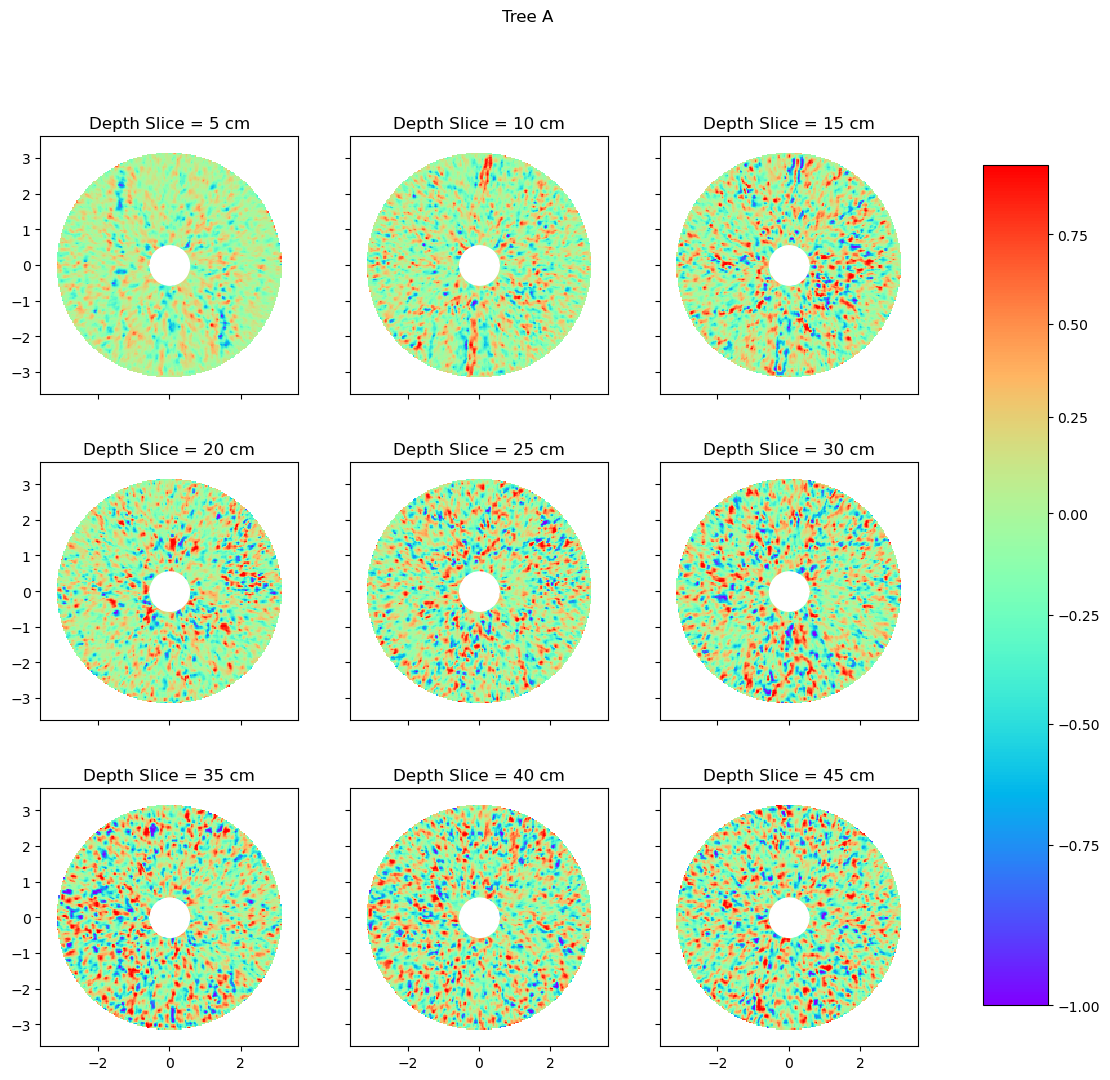

In [19]:
multiplot_interpolated(int_mesh_5cm, amplitude_list, norm_val = .8, inner_rad=0.5512, outer_rad=3.1512, title= 'Tree A')
  